# TP03: Restauration D'images
### Ahmed Ben Saad

## I. Altération d'une image

In [53]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import cg

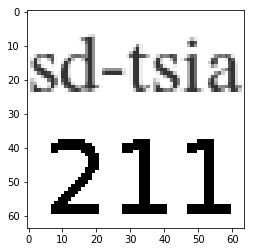

In [16]:
path='' #change for filepath
#open file
data = pickle.load(open(path+'data2018forpython2.pk','rb'),encoding='latin1')
#load the original image
X=data.get('original')
#plot image
plt.imshow(X,cmap='gray')
plt.show()

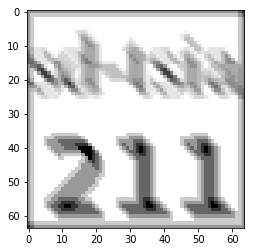

In [52]:
H=data.get('H')
h=H.toarray()
X=np.reshape(X,(4096,1))
XX=H*X
XX=XX.reshape((64,64))
plt.imshow(XX,cmap='gray')
plt.show()

## II. Restauration d'image par l'algorithme ADMM


### Préparation 1

# TODO REP SUR QUESTION

### Préparation 2

# TODO REP SUR QUESTION

### Préparation 3

In [59]:
T=data.get('T')
T=T.toarray()
p=4096

In [177]:
def argmin_x(x,z1,z2,g1,g2,rho,y):
    M= np.dot(np.transpose(h),h)+ rho*np.dot(np.transpose(T),T)+np.eye(p)
    B=(rho*(z1+np.dot(np.transpose(T),z2))) + (np.dot(np.transpose(h),y)) - g1 - (np.dot(np.transpose(T),g2))
    x=(cg(M,B)[0]).reshape((4096,1))
    return x

### Préparation 4

# TODO TROUVER LA FORMULE DE Zk+1

In [207]:
def argmin_z1(x,rho,g1):
    maxx=np.maximum(0.,(1./rho)*g1+x)
    minn=np.minimum(1.,maxx)
    return(minn)

# TODO TROUVER LA FORMULE DE Z2 k+1

In [212]:
def argmin_z2(x,rho,g2,beta,T):
    Tx=np.dot(T,x)
    rhog=(1./rho)*g2
    return((Tx+rhog)*np.maximum(0.0,1.0-(1./rho)*beta/np.linalg.norm(Tx+rhog)))

### Préparation 5

In [216]:
def maj_g1_g2(x,z1,z2,rho,g1,g2,T):
    new_g1=g1+rho*(x-z1)
    new_g2=g2+rho*(T.dot(x)-z2)
    return (new_g1,new_g2)
    
    

## III. Implémentation de l'ADMM pour résoudre le problème de restauration d'image


In [217]:
rho=0.05
beta=0.01
kmax=100
y=np.reshape(X,(4096,1))
x=np.ones((4096,1))
z1=x
z2=T.dot(x)
g1=x
g2=np.ones((4096*2-64-64,1))


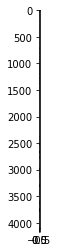

In [218]:
for i in range(kmax):
    x=argmin_x(x,z1,z2,g1,g2,rho,y)
    z1=argmin_z1(x,rho,g1)
    z2=argmin_z2(x,rho,g2,beta,T)
    g1,g2=maj_g1_g2(x,z1,z2,rho,g1,g2,T)

x=x.reshape(64,64)
plt.imshow(x,cmap='gray')
plt.show()

In [201]:
(1./rho)*g1+x

(4096, 1)